# Question number -1 

### Given an AVL tree storing numeric values, design an algorithm to efficiently return the sum of all values within a given range [L, R]. Follow-up: How would your approach scale if each tree update must propagate features for downstream ML models?

Solution: We have an AVL tree which stores numeric values. The range is L and R. 

AVL tree is basically a self balancing binary search tree. 

Algorithm: 

1. Check if the node has any child.
2. Check node is less the L value. If so then ignore these node. go right
3. Check node is greater then R value. If so then also ignore these node. go left 
4. Then sum the rest of the node.


In [10]:
class Node:
    def __init__(self, val):
        self.val = val
        self.left = None
        self.right = None

root = Node(10)
root.left = Node(5)
root.right = Node(15)
root.left.left = Node(3)
root.left.right = Node(7)
root.right.right = Node(18)


Let's apply the step by step algoritm

In [11]:
def avl_sum(root, L, R):
    if not root:
        return 0
    if root.val < L: # if current node's value is less then L search in the right subtree
        return avl_sum(root.right, L, R) 
    elif root.val > R: # if current node's value is greater then R search in the left subtree
        return avl_sum(root.left, L, R)
    else:
        return (root.val + avl_sum(root.left, L, R) + avl_sum(root.right, L, R)) # in range node added its value and search in both subtrees

Check the code

In [12]:
L = 7
R = 15
print(avl_sum(root, L, R))

32


The scalability of the ml model in downstream. Let consider a node is changed in ml feature in AVL tree it needs O(lon n) operations. In short it doesn't need to iterate all the node. Thus its very efficient. Its only change the updated node so it is faster. 

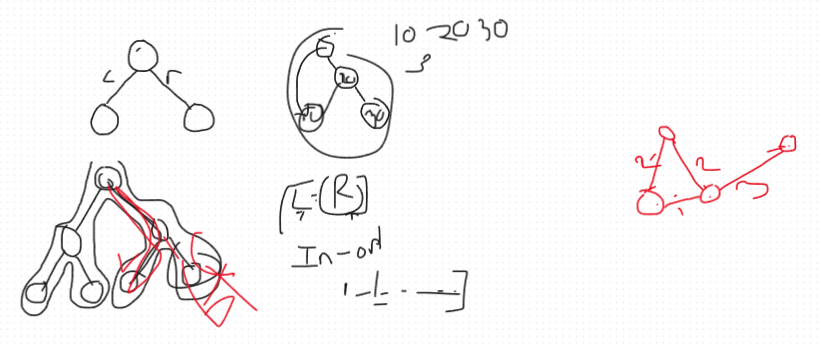

# Question number -2

## Suppose you must store and retrieve large model weight files distributed across a database. Explain how a B-Tree supports fast search and insert operations at scale.Follow-up: How does this apply to feature vector lookups in recommender systems?

Solution: B-tree is a self balancing tree data structure like AVL or Binary tree but B-tree can hold multiple children in a node where AVL can hold only two child. B-tree node works as key to find disired data. A feature in b-tree is it can hold multiple children in a node thus the hight of the tree reduce significantly which mean search for an object reduce disk uses. For efficient search key stored in node with multiple chiled a binary search is performed and search through the node until desired key found or reach a leaf node. for data insert first a binary search is initiated then find the key of the inset point if there is a room then key will insert there if there is no room or need to balenced the parent node being split and key is inserted. 

Let's considers I have a recommenders system for users. When I want to interface with the dataset to retrieve or find vectors for users. b-tree enable rapid look up which need order of log n (O(lon n)) to full scan. If the system scale to thousands of core of data then b-tree come handy with fast sequential access in sorted order.

# Question number -3

## Outline an algorithm for finding a minimum spanning tree (MST) in a distributed system. Follow-up: In what real-world ML scenario would you use MSTs (e.g., sensor network feature selection)? 

Solution: there is many algorithm to determine the minimum path. Let's talk about my approach.

1. Create path for every node. 
2. Find minimum path to reach next node.
3. If it is connected before with other node then compare the weight if the previous node is smaller then skip this path. 
4. That way every node will connected with minimum weigh path. which require less time to reach. 

Finding the shortest path there is some famous algorithm which are Kruskal's Minimum Spanning Tree, Boruvka's Minimum Spanning Tree, Prim's Minimum Spanning Tree etc. 

In sensor network feature selection mst can be used to reduce redundancy, also it improve efficiency by minimizing total communication cost. By identifying optimal path it reduce computational power. In hierachial clustering mst can connect data with minimum distances. 

# Question number -4 

## For a tree- or graph-based feature index in a memory-constrained environment, compare slab allocation vs. garbage collection as memory management strategies. Follow-up: Which option better supports predictable latency for online serving in ML systems?

Solution:In Slab allocation pre-allocate memory block for an object. each block store pre define sized memory which can be easily allocate and deallocated by pointer. It is pre define thus it is fast and predictable memory location.  In slab allocation real time task is more efficient. 
On other hand garbage collection is method to frees up unused memory by identifying object that no longer in use. This method is dynamic so developer can easily maintain memory. But is has high latency.  

For better supports predictable for online serving in ml systems latency slab allocation is good. Becaus its characteristics of better memory management and low garbage collection and low latency. This is perform good at real time task and online serving. 